In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [18]:
with sqlite3.connect("../db.sqlite3") as conn:
    query = """
    SELECT rest_prod.name, rest_prod.price, rest_ord_item.quantity, rest_ord.datetime
    FROM restaurant_orderitem as rest_ord_item
    JOIN restaurant_product as rest_prod ON rest_ord_item.product_id = rest_prod.id
    JOIN restaurant_order as rest_ord ON rest_ord_item.order_id = rest_ord.id
    """
    df = pd.read_sql_query(query, conn)
    df.to_csv("restaurant", index=False)
df

,name,price,quantity,datetime
0,Plain Papadum,0.80,2,2019-08-03 20:25:00
1,King Prawn Balti,12.95,1,2019-08-03 20:25:00
2,Garlic Naan,2.95,1,2019-08-03 20:25:00
3,Mushroom Rice,3.95,1,2019-08-03 20:25:00
4,Paneer Tikka Masala,8.95,1,2019-08-03 20:25:00
...,...,...,...,...
74813,House Red wine 75cl,17.95,2,2016-05-18 18:53:00
74814,House Red wine 75cl,17.95,2,2016-05-14 19:28:00
74815,House Red wine 75cl,17.95,2,2016-05-10 13:18:00
74816,House white wine 75cl,17.95,1,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

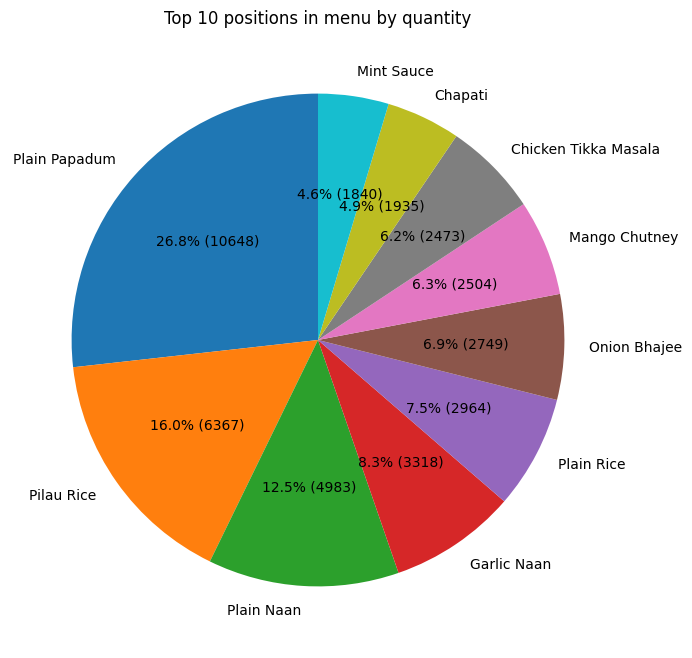

In [42]:
top_10_products = df.groupby("name")["quantity"].sum().reset_index().sort_values(by="quantity", ascending=False).head(10)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        value = int(round(pct * total / 100.0))
        return f"{pct:.1f}% ({value})"
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_products["quantity"], 
    labels=top_10_products["name"], 
    autopct=autopct_format(top_10_products["quantity"]), 
    startangle=90,
)
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

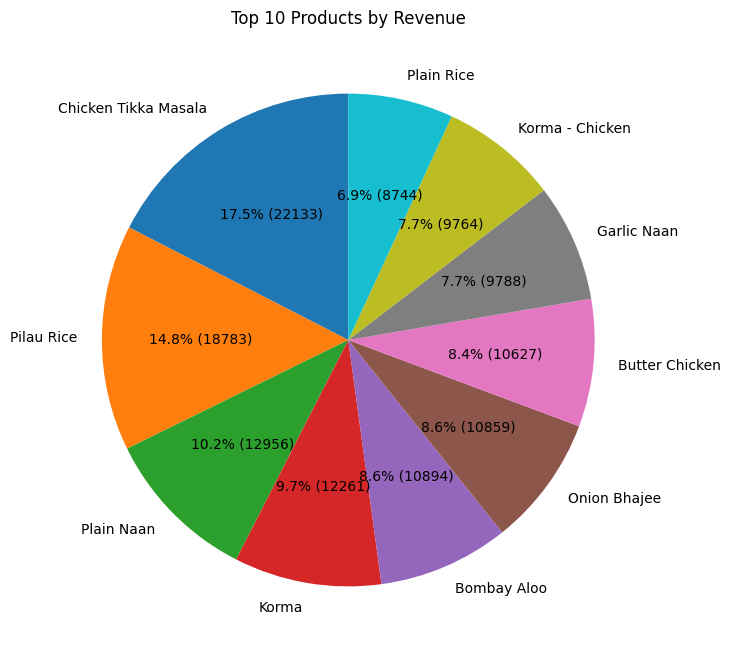

In [34]:
df["Item Price"] = df["price"] * df["quantity"]
top_10_revenue = df.groupby("name")["Item Price"].sum().reset_index().sort_values(by="Item Price", ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_revenue["Item Price"], 
    labels=top_10_revenue["name"], 
    autopct=autopct_format(top_10_revenue["Item Price"]), 
    startangle=90,
)
plt.title("Top 10 Products by Revenue")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

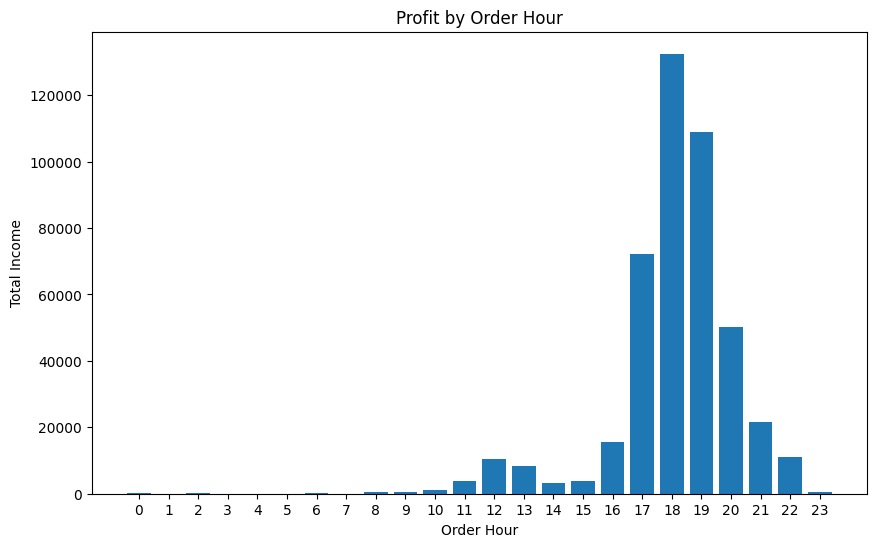

In [53]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
hourly_income = df.groupby("order_hour")["Item Price"].sum()
plt.figure(figsize=(10, 6))
plt.xticks(range(24))
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Profit by Order Hour")
plt.bar(hourly_income.index, hourly_income)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

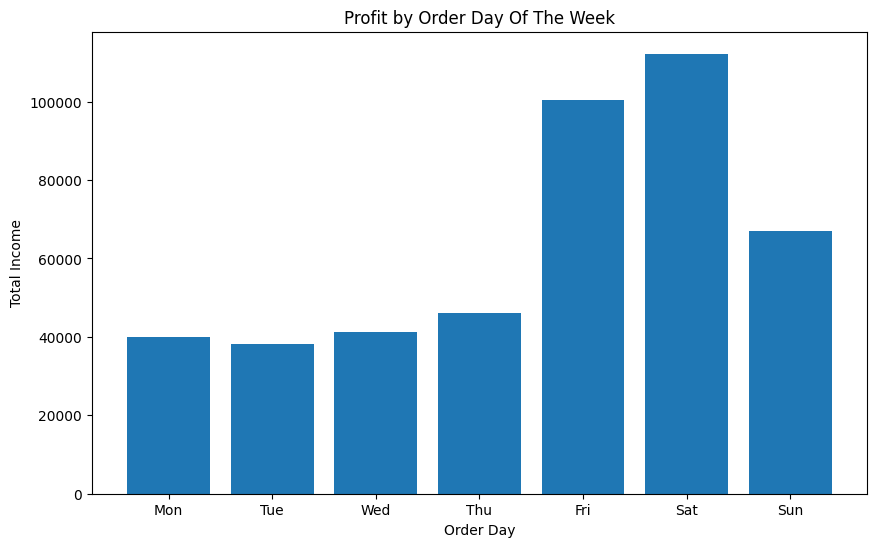

In [54]:
df["Day of the week"] = df["datetime"].dt.dayofweek
income_by_day = df.groupby("Day of the week")["Item Price"].sum()
plt.figure(figsize=(10, 6))
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun",])
plt.xlabel("Order Day")
plt.ylabel("Total Income")
plt.title("Profit by Order Day Of The Week")
plt.bar(income_by_day.index, income_by_day)
plt.show()